Python Data science Handbook

SciKit-Learn

In [20]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\einst\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


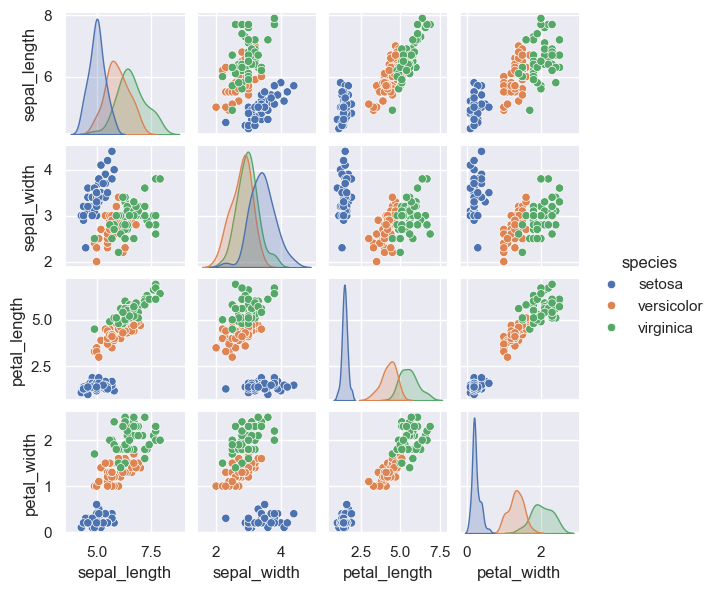

In [21]:
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [22]:
#Feature Matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape


(150, 4)

In [23]:
#Target array
y_iris = iris['species']
y_iris.shape



(150,)

Supervised learning example: Simple linear regression


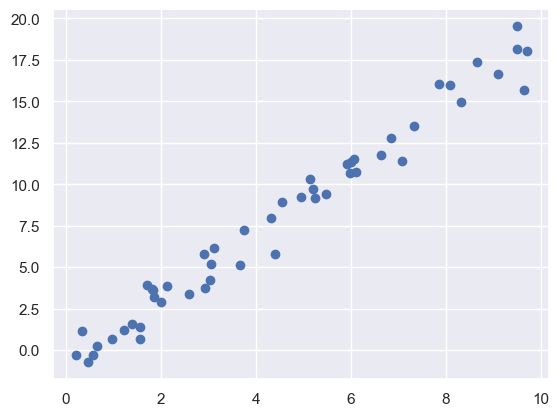

In [24]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [26]:
#Arrange data 
X=x[:,np.newaxis]
print(X)
print(X.shape)

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]]
(50, 1)


In [27]:
#Fit the model to your data
model.fit(X, y)

LinearRegression()

In [28]:
#results
print(model.coef_) #slope
print(model.intercept_) #intercept

#Page 351

[1.9776566]
-0.903310725531111


Predict labels for unknown data

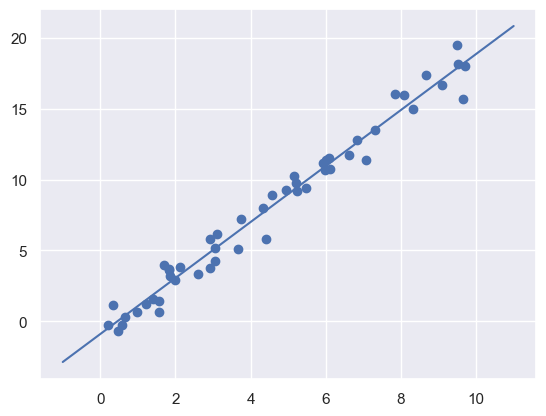

In [29]:
#Once the model is trained, the main task of supervised machine learning is to
#evaluate it based on what it says about new data that was not part of the training
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised learning example: Iris classification

In [30]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [31]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
#Gaussian Naive Bayes
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [32]:
#Finally, we can use the accuracy_score utility to see the fraction of predicted labels
#that match their true value:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised learning example: Iris dimensionality

In [33]:
#convert the four dimentional iris data into a less dimensional (2D) set that can describe the data
#PCA is Principal Component Analysis
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

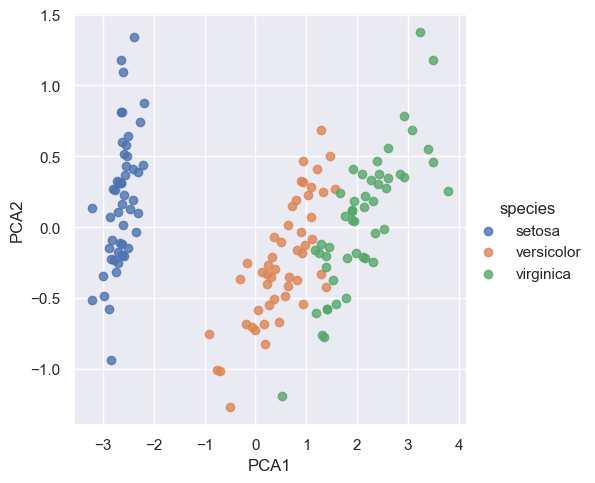

In [36]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1",y= "PCA2", hue='species', data=iris, fit_reg=False)

Unsupervised learning: Iris clustering

In [39]:
#get clusters without reference to any label
#Gaussian Mixture Model
from sklearn import mixture# 1. Choose the model class
model = mixture.GaussianMixture(n_components=3,covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

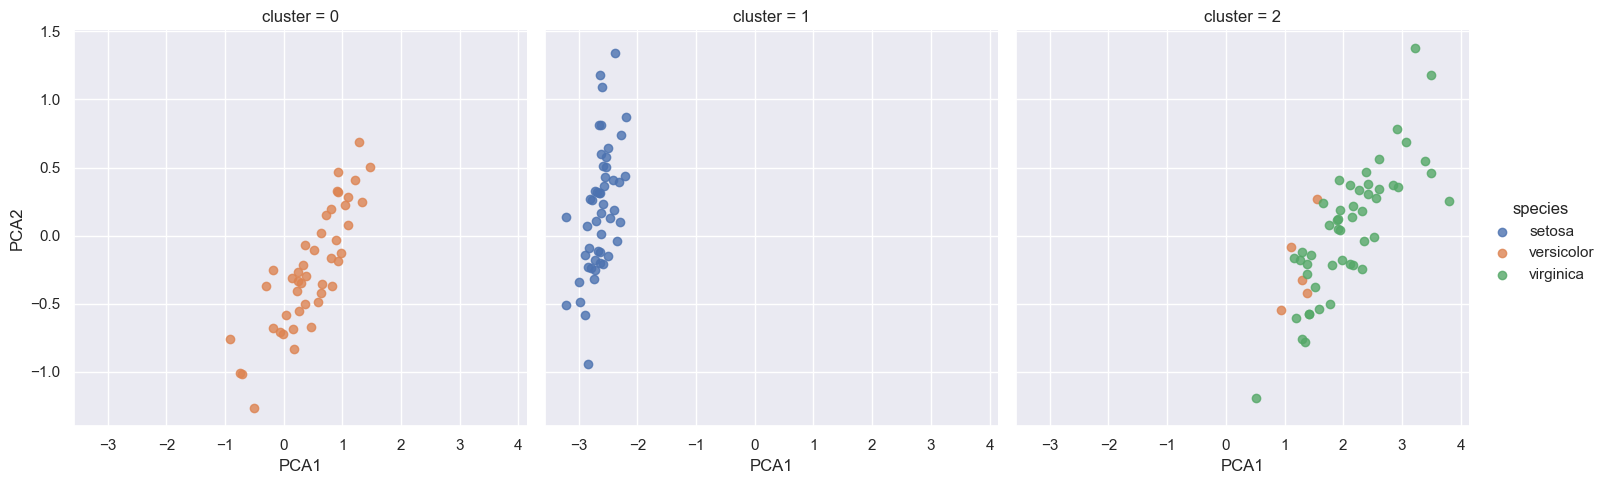

In [40]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',col='cluster', fit_reg=False);
#k-means clusters


Application: Exploring Handwritten Digits

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
#The images data is a three-dimensional array: 1,797 samples, each consisting of an
#8×8 grid of pixels. Let’s visualize the first hundred of these

(1797, 8, 8)

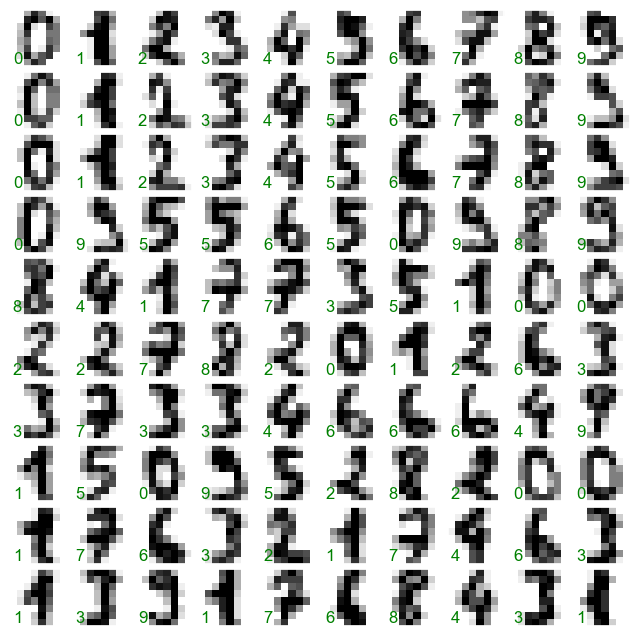

In [44]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [45]:
X = digits.data
X.shape

(1797, 64)

In [47]:
y = digits.target
y.shape
#We see here that there are 1,797 samples and 64 features.

(1797,)

Unsupervised learning: Dimensionality reduction

In [48]:
#reduce 64 dimensions to 2 dimensions 
#manifold learning algorithm called Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\einst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\einst\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

C:\Users\einst\AppData\Local\Temp\ipykernel_16456\3524066099.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


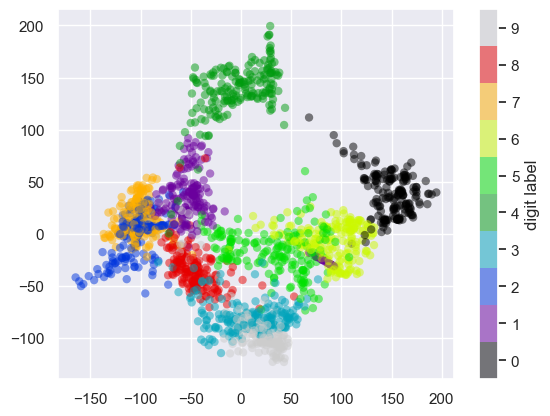

In [52]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
#page 357